In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unemployment-dataset/unemployment analysis.csv


In [3]:
df = pd.read_csv('/kaggle/input/unemployment-dataset/unemployment analysis.csv')

In [4]:
df.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [5]:
df = df.drop('Country Code', axis = 1)

In [6]:
df['Country Name'].nunique(), df['Country Name'].unique()

(235,
 array(['Africa Eastern and Southern', 'Afghanistan',
        'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
        'United Arab Emirates', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
        'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
        'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
        'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
        'Botswana', 'Central African Republic', 'Canada',
        'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
        'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
        'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
        'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
        'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
        'East Asia & Pacific (excluding high income)',
        'Early-demographic dividend', 'East Asi

In [7]:
df.sample(10)

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
15,Burkina Faso,2.58,2.61,2.58,2.58,2.53,2.47,2.47,2.44,2.51,...,3.91,4.05,4.19,4.32,4.43,4.56,4.69,4.69,4.89,4.76
226,Virgin Islands (U.S.),12.35,12.51,12.70,12.47,12.13,12.21,12.12,11.86,11.50,...,12.23,12.76,12.79,12.62,12.68,12.32,12.43,12.47,13.55,13.27
132,Maldives,0.89,0.86,0.84,0.81,0.79,1.03,1.27,1.50,1.74,...,9.47,8.73,7.87,6.93,6.12,5.87,5.62,5.34,6.33,6.08
160,Other small states,11.71,12.30,13.01,13.41,13.86,14.11,14.34,14.06,13.97,...,10.73,10.87,10.66,10.61,10.61,10.28,9.92,9.79,11.01,10.98
12,Burundi,1.51,1.53,1.56,1.56,1.58,1.59,1.57,1.56,1.58,...,1.59,1.58,1.57,1.60,1.59,1.59,1.59,1.59,1.71,1.79
52,Algeria,20.60,24.38,26.23,27.74,31.84,28.53,25.43,26.66,28.30,...,10.97,9.82,10.21,11.21,10.20,10.33,10.42,10.51,12.55,12.70
135,Middle income,4.22,4.29,4.52,4.86,5.16,5.26,5.35,5.58,5.74,...,5.26,5.27,5.26,5.42,5.59,5.60,5.50,5.53,6.67,6.32
188,Somalia,19.19,19.27,19.16,19.33,19.14,19.10,19.14,19.08,19.06,...,18.97,18.95,18.93,18.90,18.89,18.88,18.85,18.83,19.72,19.86
161,Pakistan,0.62,0.66,0.56,0.59,0.60,0.60,0.54,0.56,0.57,...,1.85,2.95,1.83,3.57,3.78,3.92,4.08,3.54,4.30,4.35
137,Mali,3.52,3.54,3.47,3.43,3.40,3.33,3.30,4.05,4.82,...,6.65,6.35,6.38,7.73,7.57,7.41,7.43,7.44,7.70,7.72


In [8]:
df = df.set_index('Country Name')
df = df.T
df.head(10)

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1991,7.80,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.60,9.58,...,9.45,12.35,2.09,1.68,4.80,2.10,8.32,29.95,18.90,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.80,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.10,5.30,10.87,...,6.60,12.70,1.97,1.73,5.23,2.63,8.35,29.92,19.70,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.60,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.80,18.80,6.70,8.47,...,10.24,12.13,1.90,1.74,5.63,3.19,8.96,29.89,16.81,5.63
1996,7.84,10.96,4.57,4.10,13.93,12.38,1.90,17.11,9.30,8.51,...,11.77,12.21,1.93,1.72,5.70,3.47,9.59,29.87,15.30,6.25
1997,7.86,10.78,4.60,4.09,16.88,11.95,1.98,14.82,10.80,8.36,...,11.16,12.12,2.87,1.68,5.70,3.90,10.20,29.91,13.64,6.93
1998,7.81,10.80,4.66,4.07,20.05,11.97,2.14,12.65,9.40,7.68,...,11.15,11.86,2.29,1.76,5.86,4.18,10.81,29.95,12.00,6.46
1999,7.79,10.81,4.86,4.05,20.84,12.11,2.22,14.05,11.20,6.87,...,14.53,11.50,2.33,1.78,5.97,4.48,11.46,29.91,12.44,6.00
2000,7.72,10.81,4.92,4.03,19.03,12.60,2.25,15.00,11.05,6.28,...,13.99,11.11,2.26,1.69,5.77,4.66,11.56,29.88,12.93,5.69


<Figure size 1600x600 with 0 Axes>

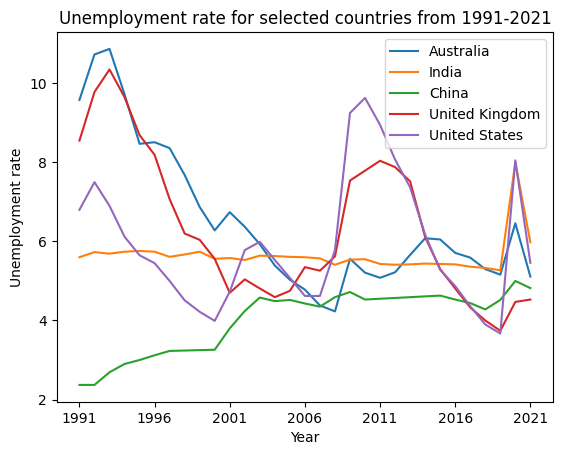

In [9]:
plt.figure(figsize = (16,6));
df[['Australia', 'India', 'China', 'United Kingdom', 'United States']].plot();
plt.xlabel('Year');
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for selected countries from 1991-2021');
plt.legend(loc = 'upper right');